In [1]:
## note these to add w/Poetry to the Dockerfile
%pip install pandas
%pip install networkx
%pip install scipy

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.spatial.distance import pdist
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras import Model
from tensorflow.keras.constraints import NonNeg 

In [4]:
url = 'http://cs.bc.edu/~prudhome/AAPLD/animal-similarity.csv'

raw_dataset = pd.read_csv(url, index_col=0)
list_of_animal_pairs = raw_dataset.index.str.split('~')

In [5]:
animal_pair_data = pd.DataFrame.from_records(list_of_animal_pairs, columns=['first_animal', 'second_animal'], index= raw_dataset.index)

In [6]:
animal_pair_data.sort_values(by = ['first_animal', 'second_animal'], inplace=True)

In [7]:
unique_animals = set(animal_pair_data.first_animal).union(animal_pair_data.second_animal)

In [8]:
animal_pairs = nx.Graph()
animal_pairs.add_nodes_from(unique_animals)
animal_pairs.add_edges_from(list_of_animal_pairs)

In [9]:
low_degree=[k for k,v in animal_pairs.degree._nodes.items() if len(v) < 32]

In [10]:
animal_pairs.remove_nodes_from(low_degree)

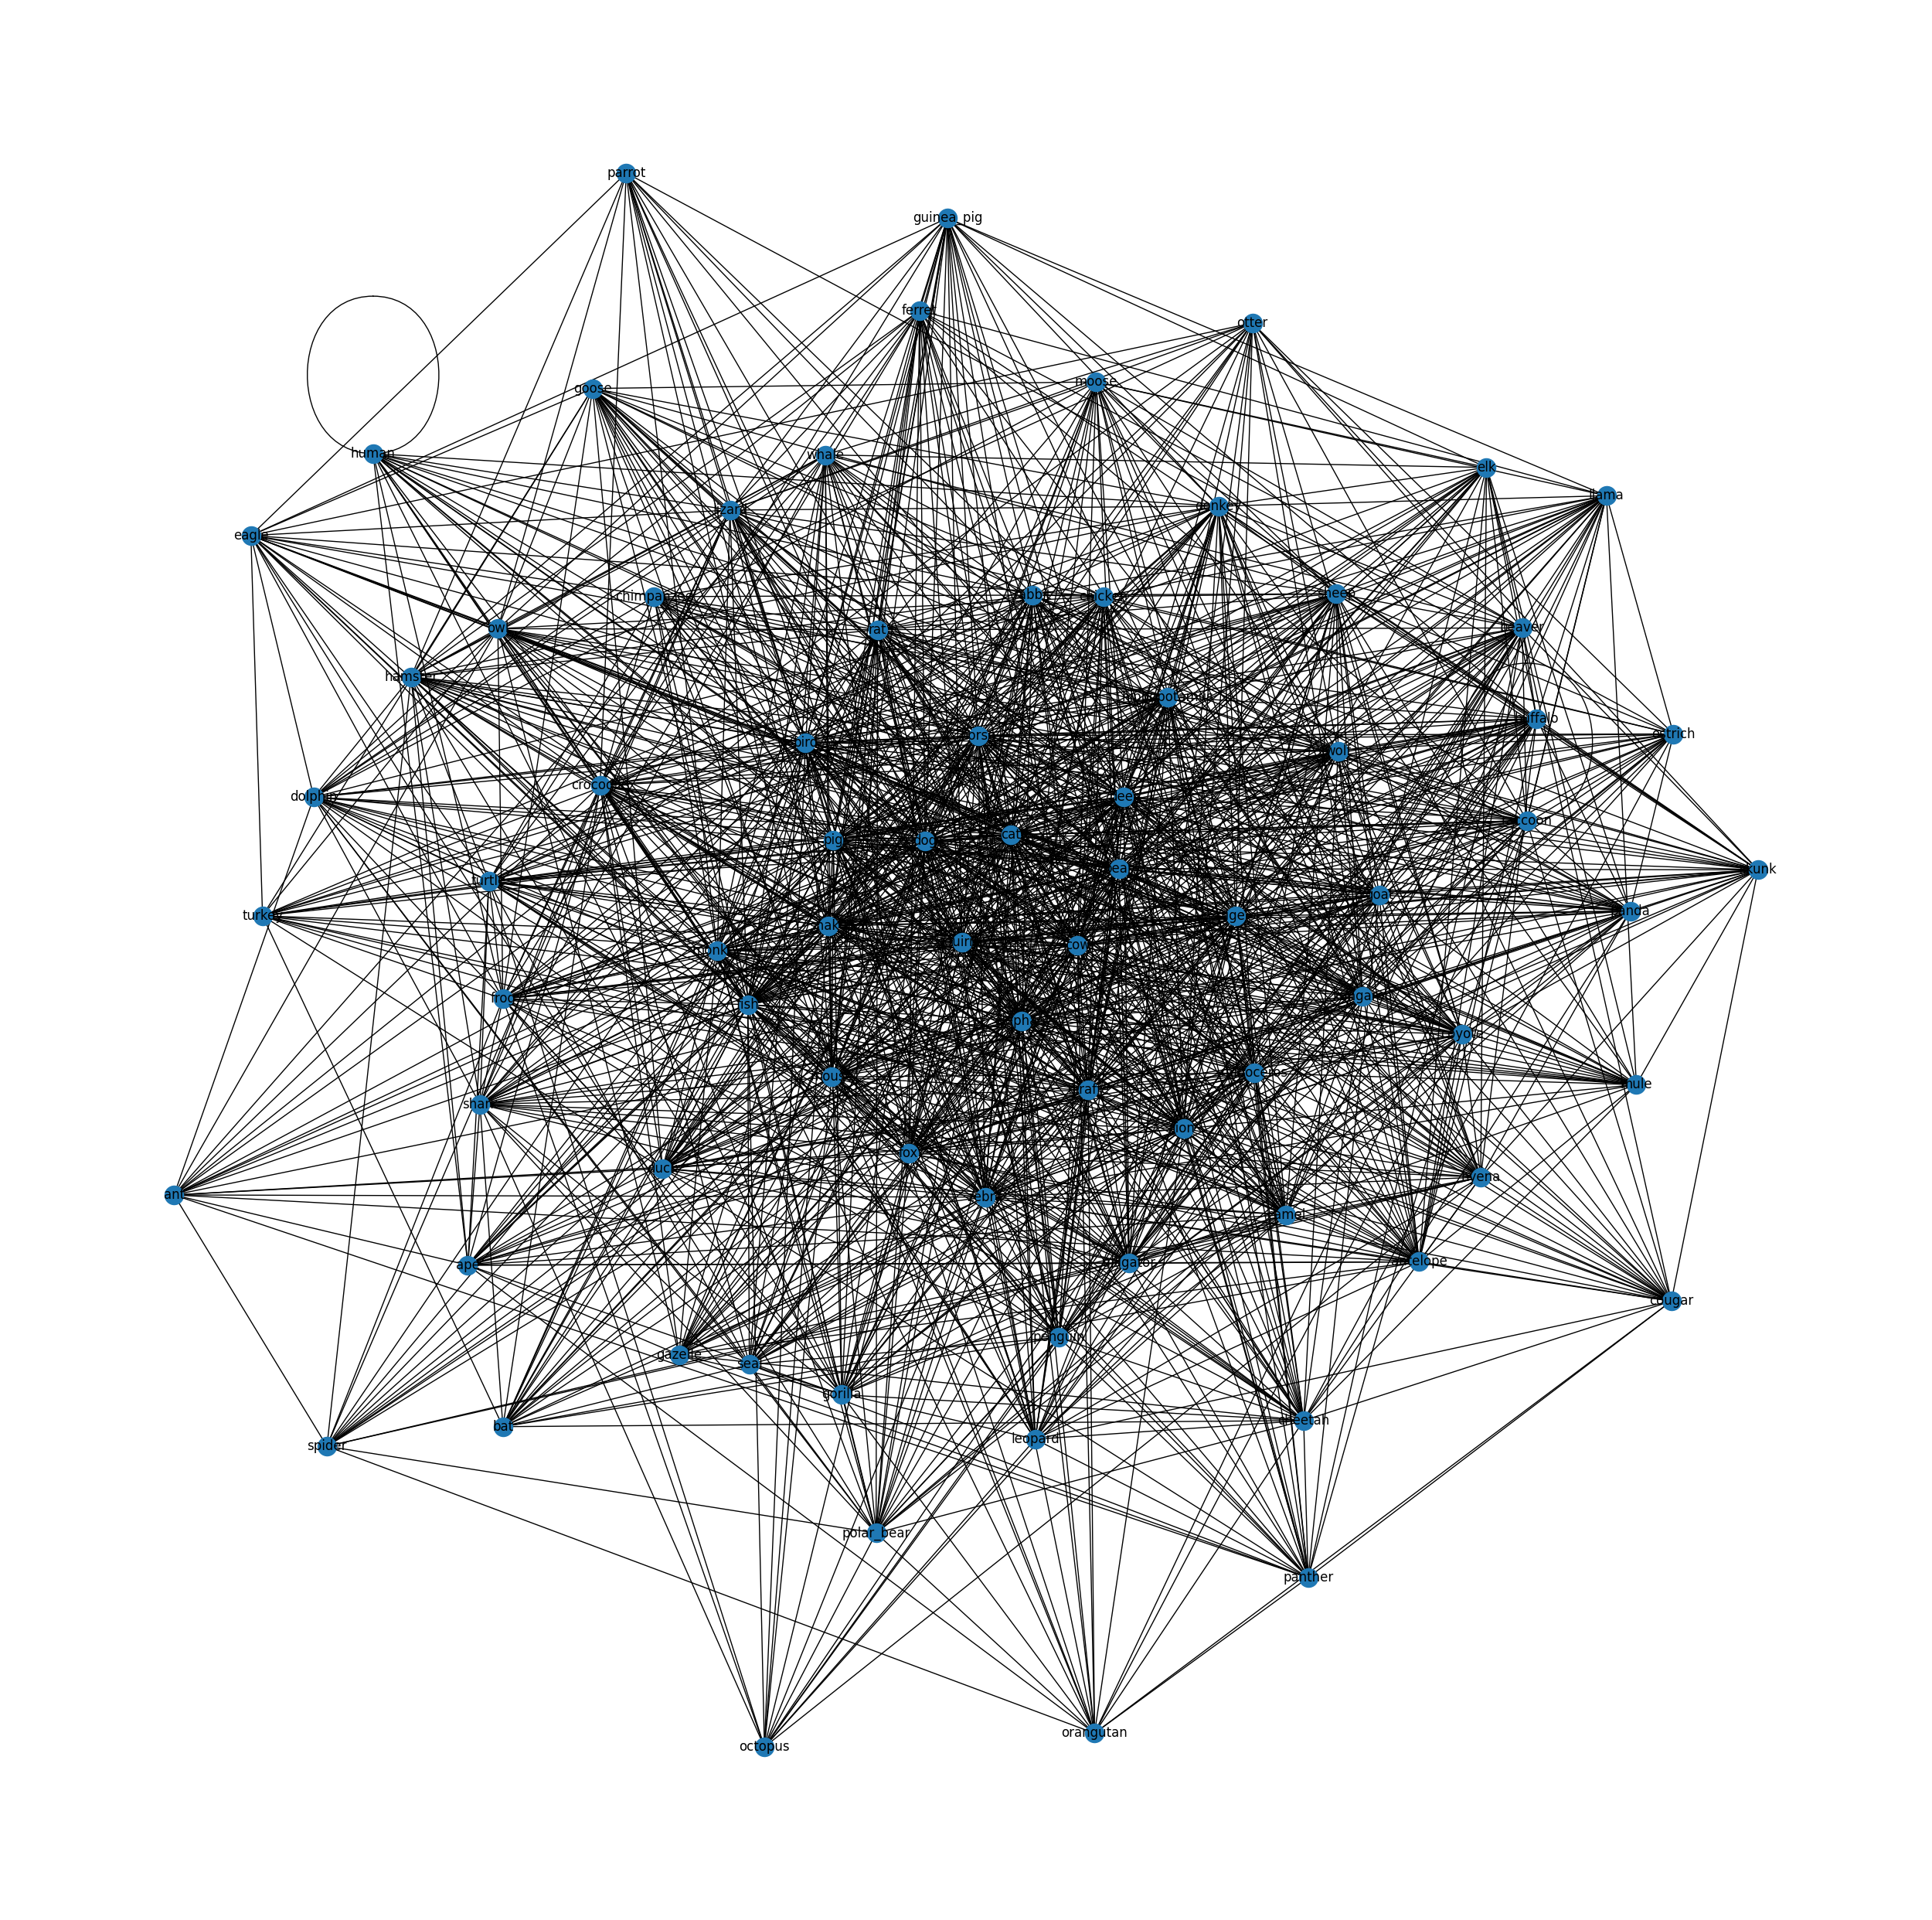

In [11]:
fig, ax = plt.subplots(figsize=(32,32))
nx.draw(animal_pairs, with_labels=True, ax=ax)

plt.show()

In [12]:
connected_list = [x for x in animal_pairs.nodes]

In [13]:
# try the small list, or, failing that, just the apes

In [14]:
smaller_animal_pair_data=animal_pair_data.loc[animal_pair_data['first_animal' ].isin( connected_list) & animal_pair_data['second_animal' ].isin( connected_list) ] 

In [15]:
joined_data=smaller_animal_pair_data.join(raw_dataset).drop(columns='[All_Ratings]')

In [16]:
big_matrix = pd.DataFrame(index=connected_list, columns = connected_list)

In [17]:
joined_data

first_animal second_animal  Average_Rating
Pair                                                         
alligator~antelope    alligator      antelope           1.940
alligator~bird        alligator          bird           2.080
alligator~buffalo     alligator       buffalo           1.080
alligator~elephant    alligator      elephant           1.140
alligator~fish        alligator          fish           1.000
...                         ...           ...             ...
zebra~seal                zebra          seal           1.040
zebra~shark               zebra         shark           1.067
zebra~snake               zebra         snake           1.880
zebra~tiger               zebra         tiger           2.720
zebra~turtle              zebra        turtle           1.120

[1601 rows x 3 columns]

In [18]:
#TODO wrap below section into functions

In [19]:
for row in joined_data.iterrows():
    big_matrix.loc[row[1].first_animal][row[1].second_animal] = row[1].Average_Rating
    big_matrix.loc[row[1].second_animal][row[1].first_animal] = row[1].Average_Rating

In [20]:
big_matrix = big_matrix.astype(float)

In [21]:
# big_matrix = big_matrix[big_matrix.isna().mean(1) < 0.5]
# big_matrix = big_matrix[big_matrix.index.to_list()]

In [22]:
big_matrix = big_matrix[big_matrix.isna().mean(1) < 0.33]

In [23]:
big_matrix = big_matrix[big_matrix.index.to_list()]

In [24]:
plt.matshow(big_matrix)

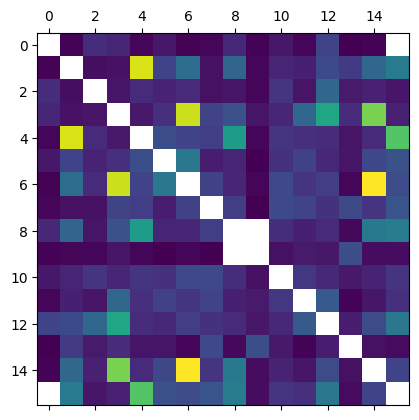

In [25]:
plt.show()

In [26]:
big_matrix.isna().mean(1)

bird        0.1250
zebra       0.0625
monkey      0.0625
cat         0.0625
horse       0.0625
giraffe     0.0625
lion        0.0625
bear        0.0625
cow         0.1250
fish        0.1250
elephant    0.0625
pig         0.0625
dog         0.0625
snake       0.0625
tiger       0.0625
deer        0.1250
dtype: float64

In [27]:
big_matrix.shape

(16, 16)

In [28]:
big_matrix

bird  zebra  monkey    cat  horse  giraffe   lion   bear    cow  \
bird       NaN  1.060    1.68  1.560  1.080    1.340  1.040  1.100  1.580   
zebra     1.06    NaN    1.20  1.260  5.917    2.040  2.840  1.240  2.700   
monkey    1.68  1.200     NaN  1.320  1.640    1.500  1.640  1.240  1.290   
cat       1.56  1.260    1.32    NaN  1.360    1.700  5.820  2.080  2.300   
horse     1.08  5.917    1.64  1.360    NaN    2.250  2.040  1.960  3.860   
giraffe   1.34  2.040    1.50  1.700  2.250      NaN  3.100  1.425  1.540   
lion      1.04  2.840    1.64  5.820  2.040    3.100    NaN  2.020  1.560   
bear      1.10  1.240    1.24  2.080  1.960    1.425  2.020    NaN  1.960   
cow       1.58  2.700    1.29  2.300  3.860    1.540  1.560  1.960    NaN   
fish      1.06  1.080    1.10  1.300  1.100    1.020  1.067  1.000    NaN   
elephant  1.34  1.550    1.81  1.560  1.800    1.740  2.160  2.160  1.683   
pig       1.10  1.460    1.28  2.717  1.720    2.020  1.780  2.080  1.460   
dog       2.05  2.175    2.72  4.080  1.660    1.600  1.940  1.760  1.620   
snake     1.00  1.880    1.38  1.660  1.300    1.300  1.100  2.160  1.110   
tiger     1.06  2.720    1.48  5.160  1.620    2.125  6.220  1.780  3.117   
deer       NaN  3.180    1.32  1.480  4.820    2.300  2.200  2.360  3.220   

           fish  elephant    pig    dog  snake  tiger  deer  
bird      1.060     1.340  1.100  2.050   1.00  1.060   NaN  
zebra     1.080     1.550  1.460  2.175   1.88  2.720  3.18  
monkey    1.100     1.810  1.280  2.720   1.38  1.480  1.32  
cat       1.300     1.560  2.717  4.080   1.66  5.160  1.48  
horse     1.100     1.800  1.720  1.660   1.30  1.620  4.82  
giraffe   1.020     1.740  2.020  1.600   1.30  2.125  2.30  
lion      1.067     2.160  1.780  1.940   1.10  6.220  2.20  
bear      1.000     2.160  2.080  1.760   2.16  1.780  2.36  
cow         NaN     1.683  1.460  1.620   1.11  3.117  3.22  
fish        NaN     1.240  1.370  1.340   2.26  1.180  1.18  
elephant  1.240       NaN  1.840  1.600   1.36  1.500  1.80  
pig       1.370     1.840    NaN  2.480   1.06  1.320  1.70  
dog       1.340     1.600  2.480    NaN   1.42  2.200  3.06  
snake     2.260     1.360  1.060  1.420    NaN  1.240  1.16  
tiger     1.180     1.500  1.320  2.200   1.24    NaN  2.04  
deer      1.180     1.800  1.700  3.060   1.16  2.040   NaN

In [29]:
# todo make into function
similarities = big_matrix.to_numpy()
similarity_vec = np.tril(similarities, -1)
similarity_vec = similarity_vec[np.nonzero(similarity_vec)]

In [30]:
# FIll in NA's 

In [31]:
similarity_vec = np.nan_to_num(similarity_vec, nan=min(similarity_vec))

In [32]:
dissimilarity_vec = np.exp(-1*similarity_vec)

In [33]:
len(dissimilarity_vec) 
# :=Y  = n(n-1)/2
# 2Y = n^2 - n
# 0 = n^2 - n - 2Y

# 0 = (n - 1/2) ^2 - 1/4 - 2Y 
# 2Y + 1/4 = (n - 1/2)^2
# N = 1/2 + sqrt(2Y + 1/4)


120

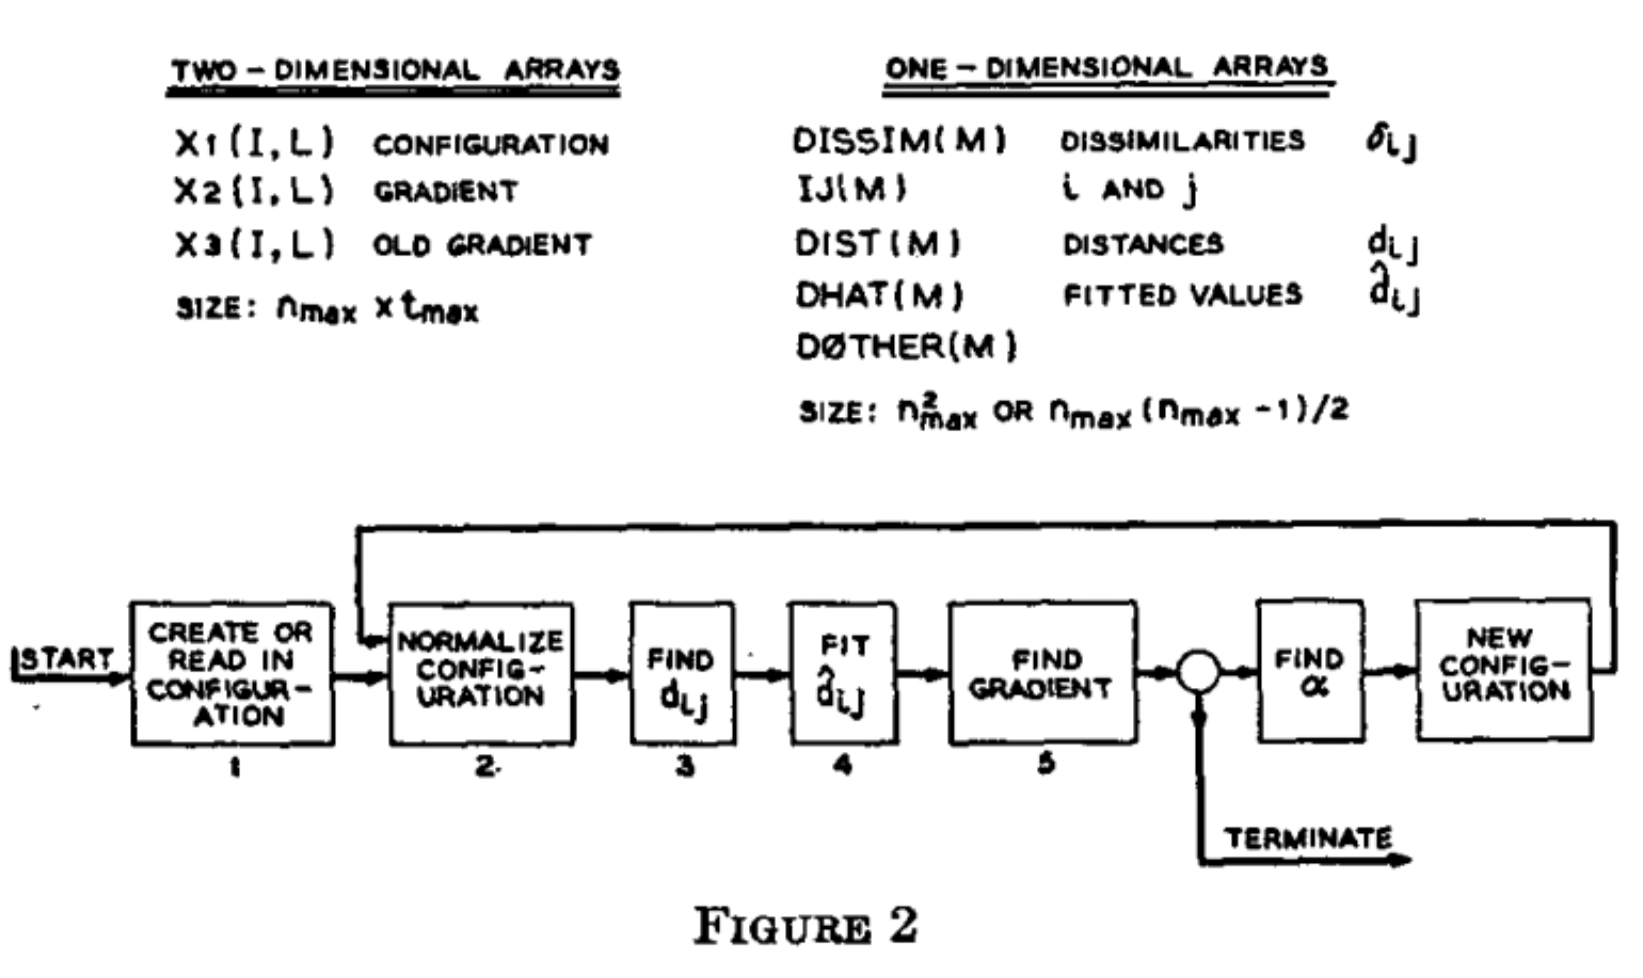
From Kruskal, 1964

Idea is to follow these steps, 

In [34]:
def generate_starting_configuration(dis_vec, n_points, dim=2):
    ## Generate kruskal_style t-dimensional starting configuration
    #  N = 1/2 + sqrt(2Y + 1/4)

    assert n_points == int(1/2 + np.sqrt(2*len(dis_vec) +1/4))
    
    max_multiplier = n_points//dim + 2
    #say 503 points in2 dim, then we need 252 diags, drop the last row of the last one , s0 have to go from 
    # 1 to n_points/dim +2
    starting_config = np.vstack([np.diag(j*np.ones(dim)) for j in range(1,max_multiplier)])
    return starting_config[:n_points,:]


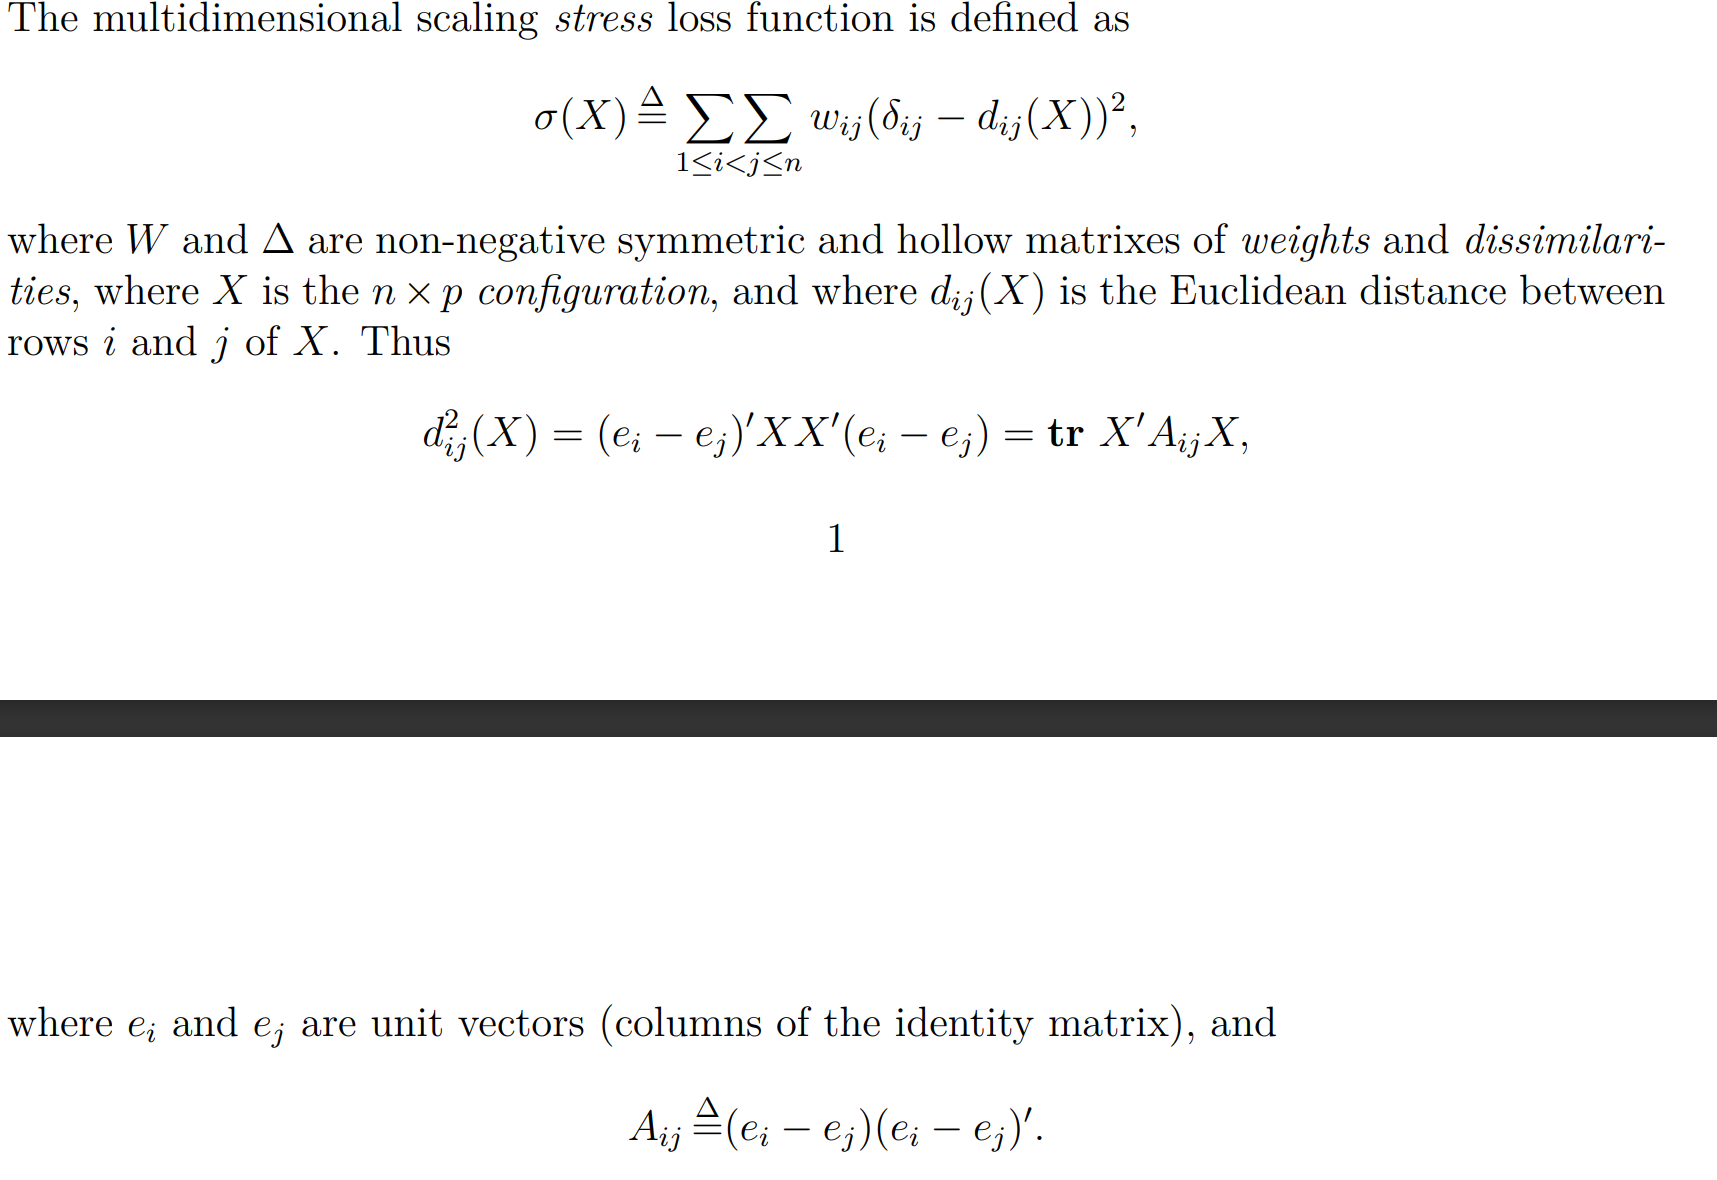
From https://jansweb.netlify.app/publication/deleeuw-e-18-c/
NB: $\delta_{ij}$ here is the true dissimilarity between $i$ and $j$ 

In [81]:
## TODO move to matrix_utils.py 
### need config_dim 
### -> then apply np.outer on each to get Aij
def self_outer(basis_vector:np.array)->np.array:
    return np.outer(basis_vector, basis_vector)
    

def pairwise_basis_diffs(max_index:int, max_rows:int)->np.array:
  
    assert max_index > 1 ## ignore first basis vector  
    eye_ref = np.eye(N=max_rows, M = max_index)
    
    # for index i and all other indices j less than it , build a 2-d array of (e_is - e_js)s
    # by subtracting highest indexed basis vector from all other basis vectors 
    ei_minus_ejs = eye_ref[:,:-1] - eye_ref[:,-1].reshape(max_rows,1)
    # find outer-product with self for each difference of basis columns (these are the A_ij s) 
    # where i is fixed at index 
    outer_list = np.apply_along_axis(func1d=self_outer, axis=0, arr=ei_minus_ejs)
    return outer_list 
### then apply func1d on Aijs 
def pairwise_dist_block_chunk(outer_distance:np.array, configuration:np.array):
    # Compute tr X'A_ij X 
    return np.trace(configuration.T @ outer_distance @ configuration)
    
## then, use listcomp to get chunk of pairwise distances and vstack the pairwise distances 
def pairwise_dist_within_block(outer_list:np.array, configuration:np.array)->np.array:
    pairwise_dist_in_block = [pairwise_dist_block_chunk(outer_list[:,:,k], configuration) for k in range(outer_list.shape[2]) ]
    return np.array(pairwise_dist_in_block)

def pairwise_dists_of_block(index:int, configuration:np.array)->np.array:
    outerL = pairwise_basis_diffs(index, configuration.shape[0])
    return pairwise_dist_within_block(outerL, configuration)

## wrap 
def get_pairwise_distances(configuration):
    ## Wrapper for pairwise distance function (if prep needed)
    return np.hstack([pairwise_dists_of_block(i, configuration) for  i in range(2, configuration.shape[0]+1)])



In [72]:
## todo move to pdistlayer.py
## convert to tensorflow
def tf_get_pw_dist():
    pass


In [73]:
## wrap pairwise distance in a layer
class PDistLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(PDistLayer, self).__init__()
        
    def call(self, inputs):
        return inputs

In [74]:
# todo make doctest for relevant fxs
index = 5
max_rows = 19
fake_dist_vec = np.ones(((max_rows**2 - max_rows)//2, 1))
eye_ref = np.eye(N=max_rows, M = index)
ei_minus_ejs =  eye_ref[:,:-1] - eye_ref[:,-1].reshape(max_rows,1)


In [75]:
test_outer = np.outer(ei_minus_ejs[:,3],ei_minus_ejs[:,3])
test_config = generate_starting_configuration(fake_dist_vec, max_rows)
outer_list = np.apply_along_axis(func1d=self_outer, axis=0, arr=ei_minus_ejs)

In [76]:
pairwise_dist_over_chunks = [pairwise_dist_block_chunk(outer_list[:,:,k], test_config) for k in range(outer_list.shape[2]) ]


In [77]:
pairwise_dist_over_chunks

[4.0, 10.0, 1.0, 13.0]

In [80]:
pairwise_dists_of_block(4, test_config)

array([5., 1., 8.])

In [42]:
np.array_equal(outer_list[:,:,3], np.outer(ei_minus_ejs[:,3],ei_minus_ejs[:,3]))

True

In [83]:
len(get_pairwise_distances(test_config))

171

In [84]:
len(fake_dist_vec)

171

In [ ]:
## Steps 
### Define configuration 
#### for each training iteration
#### normalize 
#### find pairwise distances
#### monotone regression
#### gradient descent



In [ ]:
start_config = generate_starting_configuration(dissimilarity_vec, len(big_matrix.index))


In [ ]:
#todo move to mdsmodel.py
class MDSModel(Model):
    def __init__(self):
        super(MDSModel, self).__init__()
        self.distance = PDistLayer()
        self.d1 = Dense(128, activation='relu', kernel_constraint=NonNeg())
        self.d2 = Dense(10, activation='relu', kernel_constraint=NonNeg())

    def call(self, x):
        x = self.distance(x)
        x = self.d1(x)
        return self.d2(x)

# Create an instance of the model
model = MDSModel()

In [ ]:
## Training loop
N_EPOCHS = 2

In [ ]:
# wrap in function
configuration = deepcopy(start_config)
for epoch in range(N_EPOCHS):
    # normalize! 
    configuration/=np.linalg.norm(configuration)
    # pairwise dist 
    dhat = get_pairwise_distances(configuration)
    ### Two options here: 
    #### 1. (suboptimal) use the "canned" formulas for the gradient and just use TF for the monotone regression
    #### 2. write the first layer after the inputs to compute pairwise distances and then to vectorize the lower tri, followed by a couple dense layers 
    
    

In [ ]:
plt.scatter(dhat, dissimilarity_vec)
plt.show()

In [ ]:
configuration.shape

In [ ]:
np.mean(configuration,0)

In [49]:
configuration

array([[0.12309149, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.12309149, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.12309149, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.12309149, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.12309149,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.12309149],
       [0.24618298, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.24618298, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.24618298, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.24618298, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.24618298,
        0.        ],
       [0.        , 0

In [ ]:
# Derivative analyses


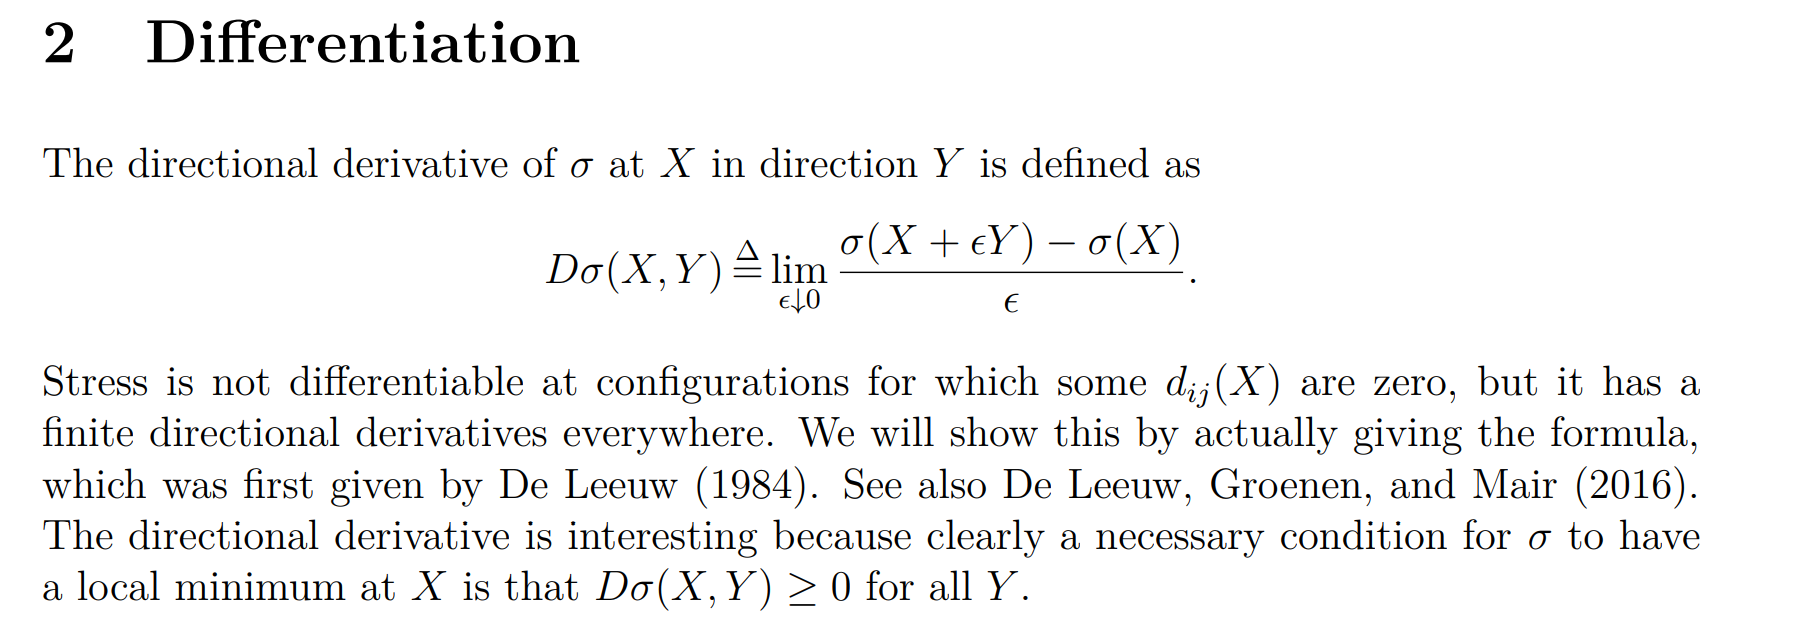
From https://jansweb.netlify.app/publication/deleeuw-e-18-c/

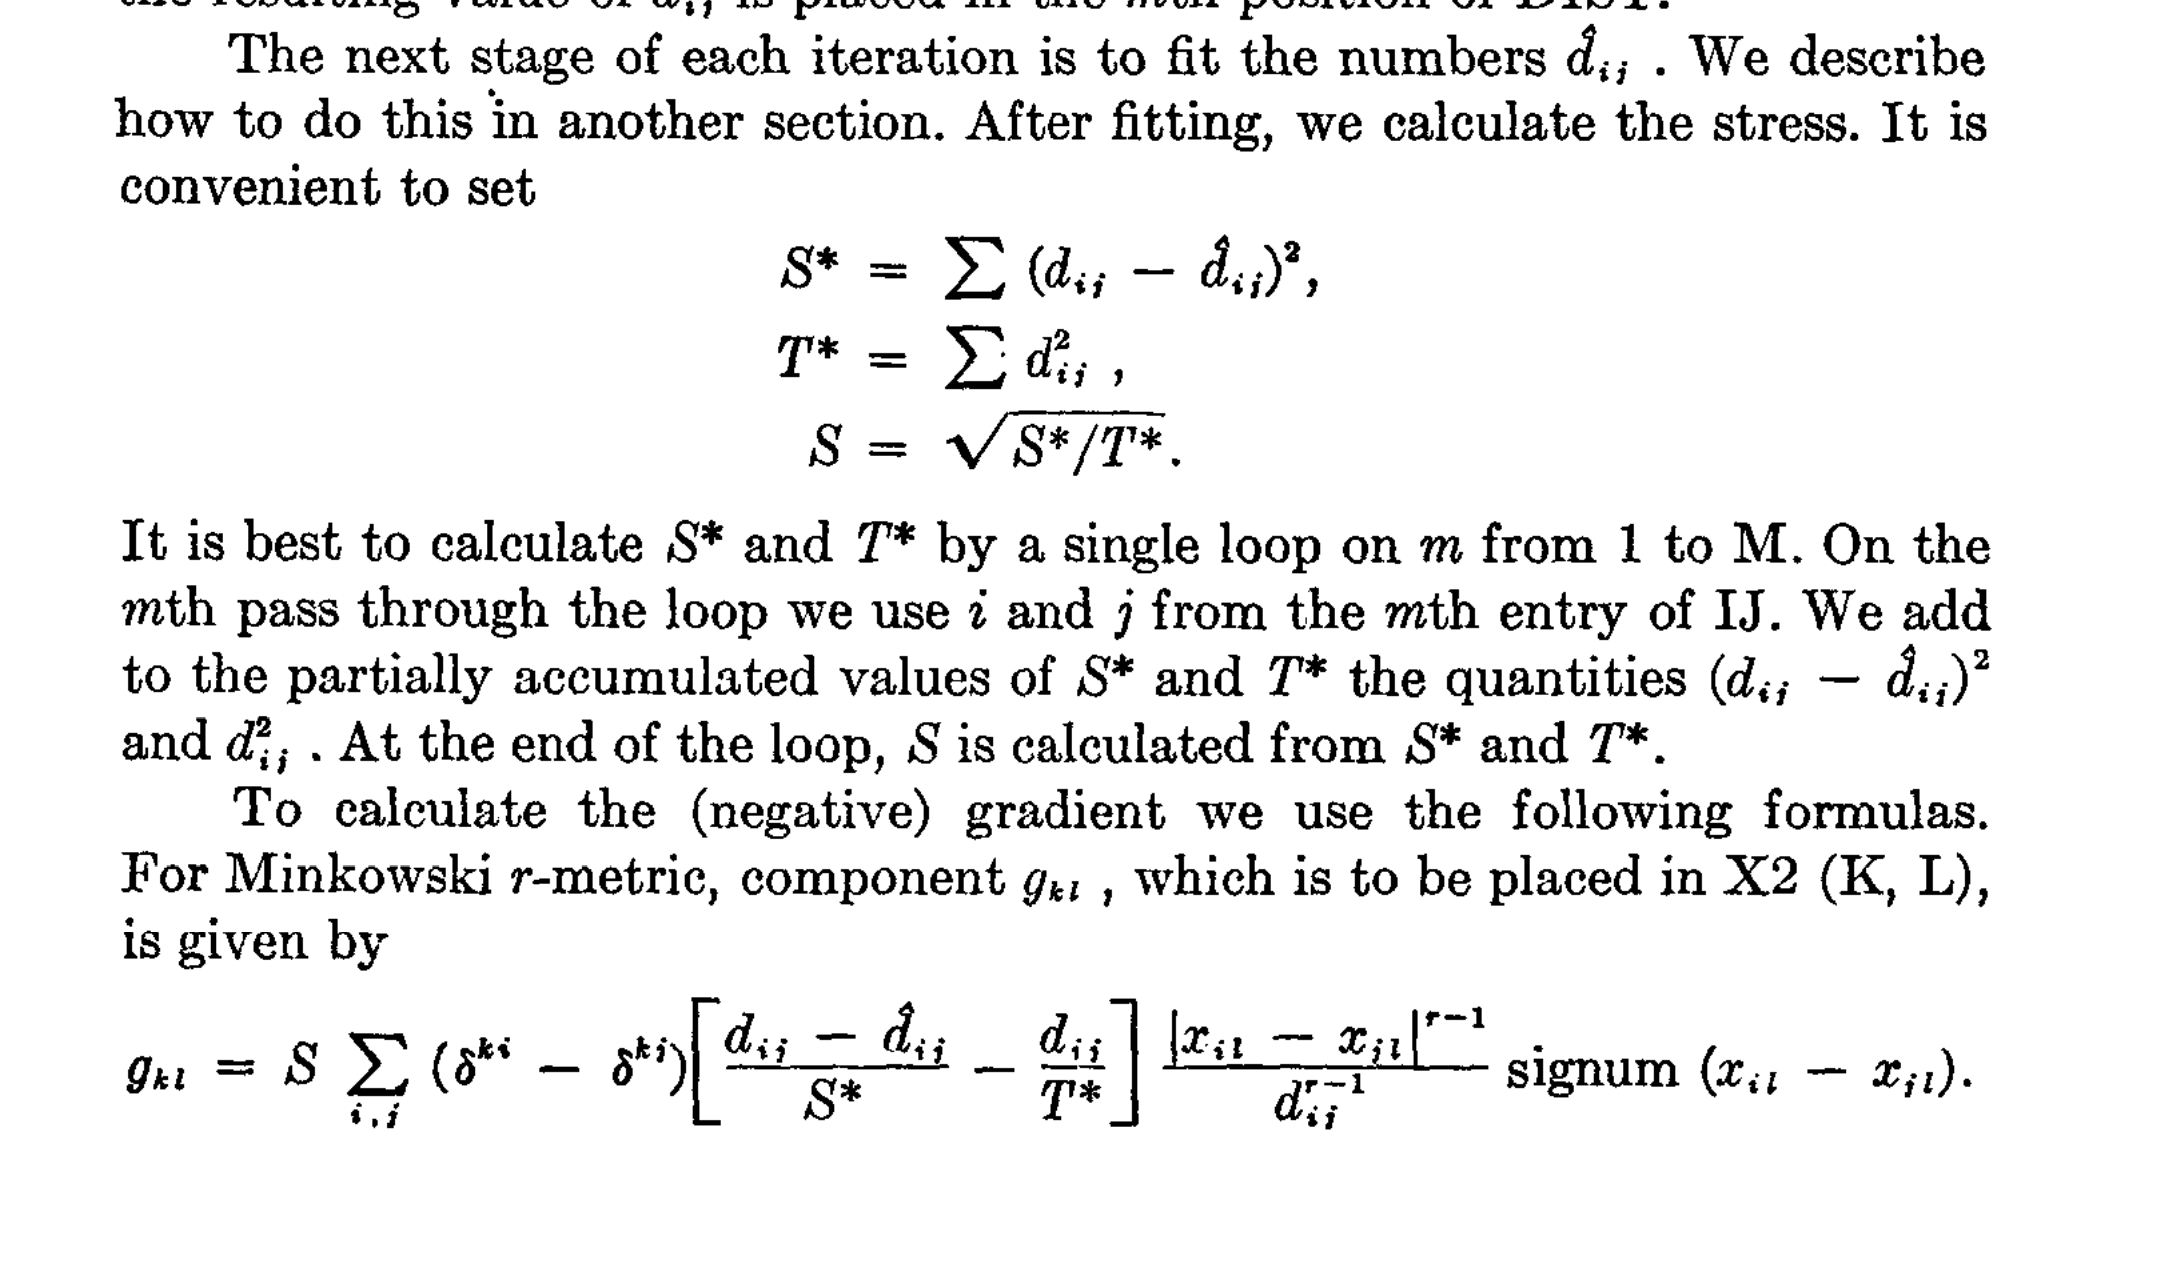
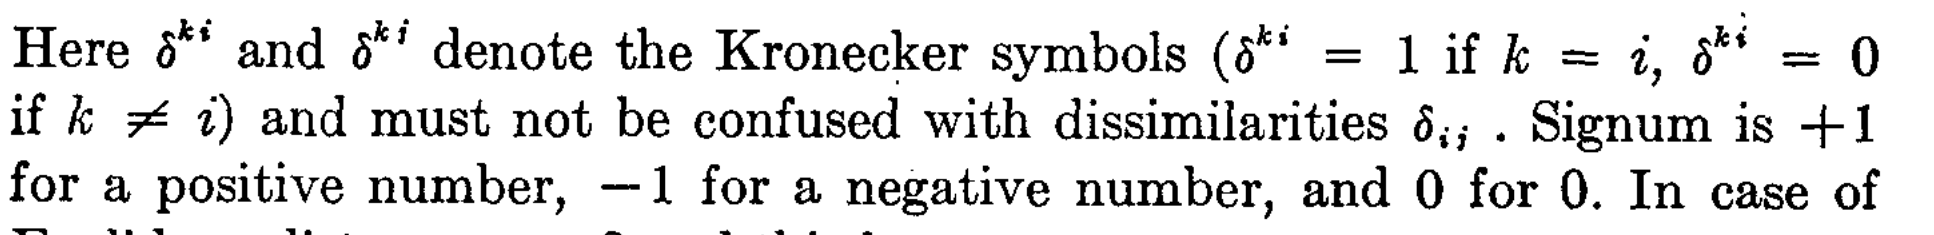
From Kruskal, 1964